In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
from sklearn.svm import SVR
import matplotlib.pyplot as plt

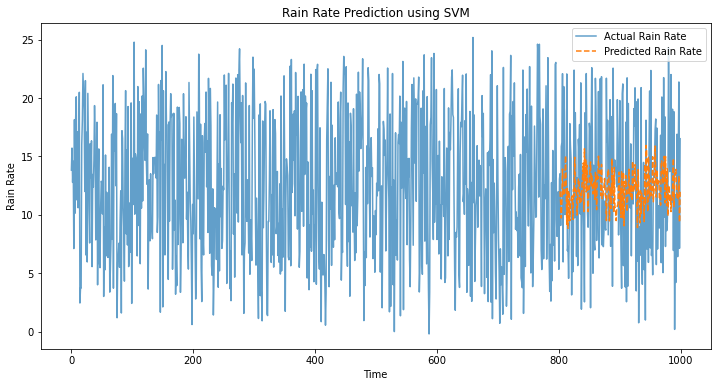

In [2]:
# Generate some example data
# Replace this with your actual time series data
np.random.seed(0)
n_samples = 1000
time = np.arange(0, n_samples)
relative_humidity = np.random.uniform(0, 100, n_samples)
atmospheric_water = np.random.uniform(0, 10, n_samples)
rain_rate = 0.2 * relative_humidity + 0.5 * atmospheric_water + np.random.normal(0, 1, n_samples)

# Create a DataFrame
data = pd.DataFrame({'time': time, 'relative_humidity': relative_humidity, 'atmospheric_water': atmospheric_water, 'rain_rate': rain_rate})

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['relative_humidity', 'atmospheric_water', 'rain_rate']])

# Create sequences for SVM
sequence_length = 10
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, :2])  # Using only relative humidity and atmospheric water as features
    y.append(scaled_data[i + sequence_length, 2])  # Rain rate is the target variable

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVR(kernel='linear')  # You can try different kernels like 'rbf' or 'poly'
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Make predictions
predicted_rain_rate = svm_model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse transform the predictions and actual values
predicted_rain_rate = scaler.inverse_transform(np.concatenate((X_test[:, -1, :2], predicted_rain_rate.reshape(-1, 1)), axis=1))[:, 2]
actual_rain_rate = scaler.inverse_transform(np.concatenate((X_test[:, -1, :2], y_test.reshape(-1, 1)), axis=1))[:, 2]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['rain_rate'], label='Actual Rain Rate', alpha=0.7)
plt.plot(time[-len(predicted_rain_rate):], predicted_rain_rate, label='Predicted Rain Rate', linestyle='dashed')
plt.title('Rain Rate Prediction using SVM')
plt.xlabel('Time')
plt.ylabel('Rain Rate')
plt.legend()
plt.show()
